In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd 
import os
import keras
import matplotlib.pyplot as plt
from numpy import genfromtxt

Using TensorFlow backend.


In [3]:
# import raw counts

In [4]:
data=pd.read_csv('/home/eugene/rna_seq/RNAseq_Counts_Bacillus_new.csv')

In [5]:
data.shape

(4255, 17)

In [6]:
#look at the data

In [7]:
data.iloc[0:10,0:5]

,Unnamed: 0,B_subtilis_021_B_rep1,B_subtilis_021_B_rep2,B_subtilis_021_LC_rep1,B_subtilis_021_LC_rep2
0,BSU00010,947.0,932.0,635.0,1067.0
1,BSU00020,434.0,465.0,759.0,1365.0
2,BSU00030,151.0,150.0,43.0,89.0
3,BSU00040,2121.0,1805.0,536.0,1017.0
4,BSU00050,272.0,227.0,53.0,95.0
5,BSU00060,3222.0,2696.0,1849.0,3028.0
6,BSU00070,4765.0,4222.0,4154.0,7642.0
7,BSU00080,46.0,52.0,19.0,38.0
8,BSU00090,1288.0,1196.0,3031.0,4560.0
9,BSU00100,973.0,997.0,587.0,1264.0


In [8]:
#may be not best way - import data again as a numpy array

In [9]:
my_data = genfromtxt('/home/eugene/rna_seq/RNAseq_Counts_Bacillus_new.csv', delimiter=',')

In [10]:
#remove row and column with description (processed incorrectly)

In [11]:
my_data=np.delete(my_data,[0],0)
my_data=np.delete(my_data,[0],1)

In [12]:
#split the data to training set and test set

In [13]:
X_set=np.zeros((my_data.shape[0],1))
test_set=np.zeros((my_data.shape[0],1))
for i in range(my_data.shape[1]):
    if i%2==1:
        X_set=np.append(X_set,my_data[:,i:i+1],axis=1)
    else:
        test_set=np.append(test_set,my_data[:,i:i+1],axis=1)

In [14]:
X_set.shape

(4255, 9)

In [15]:
test_set.shape

(4255, 9)

In [16]:
X_set=np.delete(X_set,0,1)
test_set=np.delete(test_set,0,1)

In [17]:
data_array_X=X_set

In [18]:
# in this case Y labels will be jist eye matrix with shape (8,8)

In [19]:
Z=np.eye(8)

In [20]:
trainX=data_array_X.transpose()

In [64]:
trainX[0,:5]

array([6.04436200e-04, 3.01569563e-04, 9.72805042e-05, 1.17060873e-03,
       1.47217830e-04])

In [21]:
#normalise the train array
trainX = trainX / np.linalg.norm(trainX)

In [51]:
trainX.shape

(8, 4255)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization

In [151]:
model=[]

In [152]:
#original model (approx 12.5-25% error)
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=4255))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [141]:
#testing diff models
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=4255))
# model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(Dense(8, activation='softmax'))

In [153]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1000)              4256000   
_________________________________________________________________
dense_49 (Dense)             (None, 200)               200200    
_________________________________________________________________
dense_50 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_51 (Dense)             (None, 8)                 808       
Total params: 4,477,108
Trainable params: 4,477,108
Non-trainable params: 0
_________________________________________________________________


In [154]:
opt=keras.optimizers.Adam(lr=0.0005)

In [155]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
#train the model

In [156]:
history=model.fit(trainX, Z, validation_split=0, shuffle=True, batch_size = 1, epochs = 200, verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 195ms/step - loss: 2.0888 - acc: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 41ms/step - loss: 2.0766 - acc: 0.0000e+00
Epoch 3/200
8/8 [==============================] - 0s 45ms/step - loss: 2.0652 - acc: 0.3750
Epoch 4/200
8/8 [==============================] - 0s 44ms/step - loss: 2.0562 - acc: 0.2500
Epoch 5/200
8/8 [==============================] - 0s 41ms/step - loss: 2.0442 - acc: 0.2500
Epoch 6/200
8/8 [==============================] - 0s 45ms/step - loss: 2.0257 - acc: 0.2500
Epoch 7/200
8/8 [==============================] - 0s 45ms/step - loss: 2.0029 - acc: 0.2500
Epoch 8/200
8/8 [==============================] - 0s 47ms/step - loss: 1.9599 - acc: 0.2500
Epoch 9/200
8/8 [==============================] - 0s 43ms/step - loss: 1.9304 - acc: 0.2500
Epoch 10/200
8/8 [==============================] - 0s 42ms/step - loss: 1.8733 - acc: 0.2500
Epoch 11/200
8/8 [==============================] - 0s 43ms/

8/8 [==============================] - 0s 43ms/step - loss: 0.2204 - acc: 0.8750
Epoch 89/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1713 - acc: 1.0000
Epoch 90/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1583 - acc: 1.0000
Epoch 91/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1618 - acc: 1.0000
Epoch 92/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1564 - acc: 1.0000
Epoch 93/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1517 - acc: 1.0000
Epoch 94/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1719 - acc: 1.0000
Epoch 95/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1454 - acc: 1.0000
Epoch 96/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1366 - acc: 1.0000
Epoch 97/200
8/8 [==============================] - 0s 42ms/step - loss: 0.1301 - acc: 1.0000
Epoch 98/200
8/8 [==============================] - 0s 42ms/step - loss: 

8/8 [==============================] - 0s 48ms/step - loss: 0.0130 - acc: 1.0000
Epoch 175/200
8/8 [==============================] - 0s 43ms/step - loss: 0.0123 - acc: 1.0000
Epoch 176/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0125 - acc: 1.0000
Epoch 177/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0120 - acc: 1.0000
Epoch 178/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0113 - acc: 1.0000
Epoch 179/200
8/8 [==============================] - 0s 41ms/step - loss: 0.0119 - acc: 1.0000
Epoch 180/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0109 - acc: 1.0000
Epoch 181/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0112 - acc: 1.0000
Epoch 182/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0108 - acc: 1.0000
Epoch 183/200
8/8 [==============================] - 0s 42ms/step - loss: 0.0110 - acc: 1.0000
Epoch 184/200
8/8 [==============================] - 0s 42ms/ste

In [73]:
#eval training results

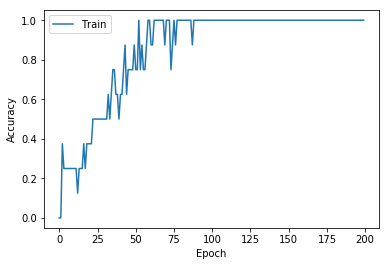

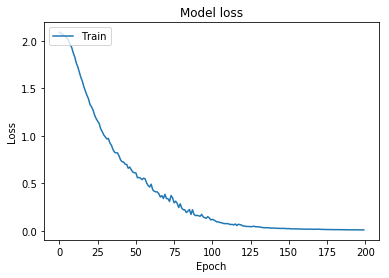

In [157]:
plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
test_set=test_set.transpose()

In [34]:
#normalizing test set

In [35]:
test_set/=np.linalg.norm(test_set)

In [36]:
#testing trained NN on the test set

In [84]:
test_set[0,:]

array([0.00092704, 0.00042485, 0.00014782, ..., 0.0012168 , 0.00024473,
       0.00234451])

In [158]:
classes = model.predict(test_set, batch_size=1)

In [159]:
for i in range(classes.shape[0]):
    print(classes[i].argmax(), classes[i].max())

0 0.73508215
1 0.85814714
2 0.99353176
3 0.960562
4 0.8844232
1 0.9563377
6 0.99121
7 0.9614951


In [160]:
error=np.zeros((classes.shape[0]))
for i in range(classes.shape[0]):
    if Z[i].argmax()-classes[i].argmax()==0:
        error[i]=0
    else:
        error[i]=1
print('Test set error =', error.sum()/len(error)*100, '%')

Test set error = 12.5 %
